# L4 Fisher Linear Discriminant

## 题1 编写函数实现Fisher线性判别分析算法

In [25]:
import numpy as np
import matplotlib.pyplot as plt
def fisher_linear_discriminant(X, y):
    # 计算类内均值
    class1_mean = np.mean(X[y == 1],axis=0)
    class2_mean = np.mean(X[y == -1],axis=0)
    # 计算类内散度矩阵
    within_class_scatter = np.dot((X[y == 1] - class1_mean).T, X[y == 1] - class1_mean) + np.dot((X[y == -1] - class2_mean).T, X[y == -1] - class2_mean)
    #计算最佳投影向量
    w = np.dot(np.linalg.inv(within_class_scatter), (class1_mean - class2_mean))
    #计算分类阈值
    threshold = np.dot((class1_mean + class2_mean) / 2, w)
    predictions = np.dot(X, w) > threshold
    predicted_labels = np.where(predictions, 1, -1)
    accuracy = np.mean(predicted_labels == y)
    
    return w, threshold, accuracy

在上面的代码中，首先导入一些必要的包，包括numpy和matplotlib,然后定义了一个fisher线性判别的函数，该函数的输入是训练数据集和测试数据集，输出是预测的准确率。在函数中，首先计算每个类别的均值向量，然后计算类内散度矩阵和类间散度矩阵，接着计算投影向量，最后计算分类阈值。函数返回值为投影向量和分类阈值。

## 题2 生成数据集并实现Fisher线性判别分析算法
下面根据题目要求生成数据集并实现Fisher线性判别分析算法。

In [26]:
import numpy as np
from sklearn.model_selection import train_test_split
import time
#设置随机种子
np.random.seed(60)
#生成200个服从正态分布的随机数
samples = 200                  #样本数
interval_1 = np.array([-5,0])  #第一类样本的区间
interval_2 = np.array([0,5])   #第二类样本的区间
cov_matrix = np.array([[1,0],[0,1]]) #协方差矩阵

#生成第一类样本
X_1 = np.random.multivariate_normal(interval_1, cov_matrix, samples)
#生成第二类样本
X_2 = np.random.multivariate_normal(interval_2, cov_matrix, samples)

#将第一类样本的标签设为1
y_1 = np.ones(samples)
#将第二类样本的标签设为-1
y_2 = np.ones(samples) * -1
#将两类样本合并
X = np.vstack((X_1, X_2))
y = np.hstack((y_1, y_2))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
X_train,y_train

(320, 2) (320,)
(80, 2) (80,)


(array([[-2.20676287,  4.3268673 ],
        [-3.88113215,  0.93214514],
        [-0.83768419,  5.20222728],
        [ 0.83830502,  6.36553836],
        [-0.90549669,  6.50099317],
        [-4.85398366, -1.40891319],
        [-0.08916944,  6.68268324],
        [-3.68790965,  0.94339814],
        [-4.36156637, -1.01792839],
        [-5.2224889 ,  0.80889026],
        [-5.50258029, -0.45504845],
        [-4.56353002, -0.53956388],
        [-4.61394773, -1.09707518],
        [-0.55191817,  5.08740217],
        [ 0.85586863,  6.82328654],
        [ 0.09383081,  3.07588707],
        [-1.07415974,  4.87988299],
        [ 1.10851638,  6.42204895],
        [-1.23533614,  5.48771821],
        [-6.27362676, -0.81513701],
        [-0.85044799,  5.33782443],
        [ 1.68382408,  5.05134051],
        [-6.01841958,  1.43097431],
        [-5.9146655 ,  1.18172303],
        [-4.77300828, -0.01092328],
        [ 1.58260822,  5.39565987],
        [-3.83311598,  0.2801483 ],
        [-2.36470723, -0.886

先研究在训练集上Fisher线性判别分析算法的表现，再研究在测试集上的表现。在训练集上:

训练集上的准确率为： 1.0
最佳投影向量为： [-0.01547046 -0.01569793]
分类阈值为： -0.0004767340256319197


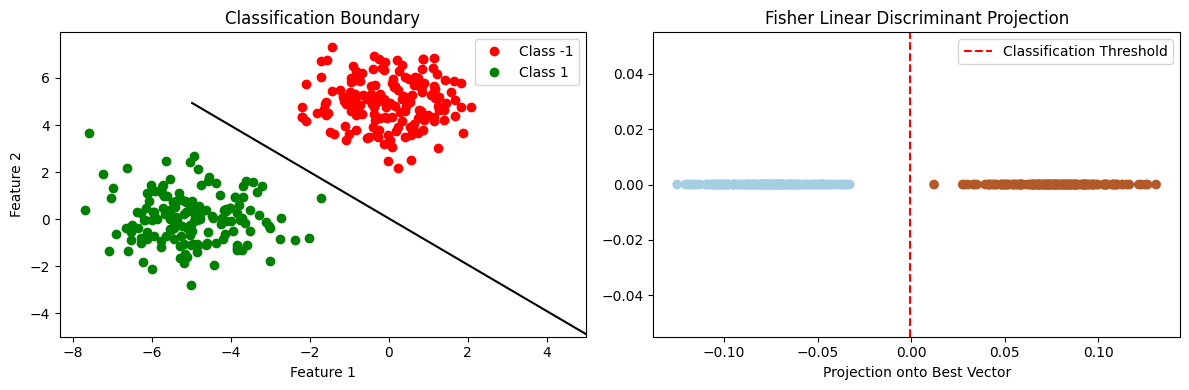

In [27]:
w_train,threshold_train,accuaracy_train = fisher_linear_discriminant(X_train,y_train)
print('训练集上的准确率为：',accuaracy_train)
print('最佳投影向量为：',w_train)
print('分类阈值为：',threshold_train)
#绘图

# 投影训练数据到一维空间
projection_train = np.dot(X_train, w_train)
xx, yy = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
Z = w_train[0] * xx + w_train[1] * yy - threshold_train

plt.figure(figsize=(12, 4))
plt.subplot(121)
label_added_green = False
label_added_red = False
for i in range(X_train.shape[0]):
    if y_train[i] > 0:
        plt.plot(X_train[i][0], X_train[i][1], 'o', color='green')
        if not label_added_green:
            plt.plot(X_train[i][0], X_train[i][1], 'o', color='green', label='Class 1')
            label_added_green = True    
    else:
        plt.plot(X_train[i][0], X_train[i][1], 'o', color='red')
        if not label_added_red:
            plt.plot(X_train[i][0], X_train[i][1], 'o', color='red', label='Class -1')
            label_added_red = True
plt.contour(xx, yy, Z, levels=[0], colors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper right')
plt.title('Classification Boundary')


plt.subplot(122)
# 绘制投影后的数据点
plt.scatter(projection_train, np.zeros_like(projection_train), c=y_train, cmap=plt.cm.Paired)
# 绘制分类阈值
plt.axvline(threshold_train, color='r', linestyle='--', label='Classification Threshold')
plt.xlabel('Projection onto Best Vector')
plt.legend()
plt.title('Fisher Linear Discriminant Projection')

plt.tight_layout()
plt.show()


与之相应的，在测试集上，我们只需要将上面的输入数据集换为测试集就可以了。

测试集上的准确率为： 1.0
最佳投影向量为： [-0.05832766 -0.11652819]
分类阈值为： -0.1564651156380162


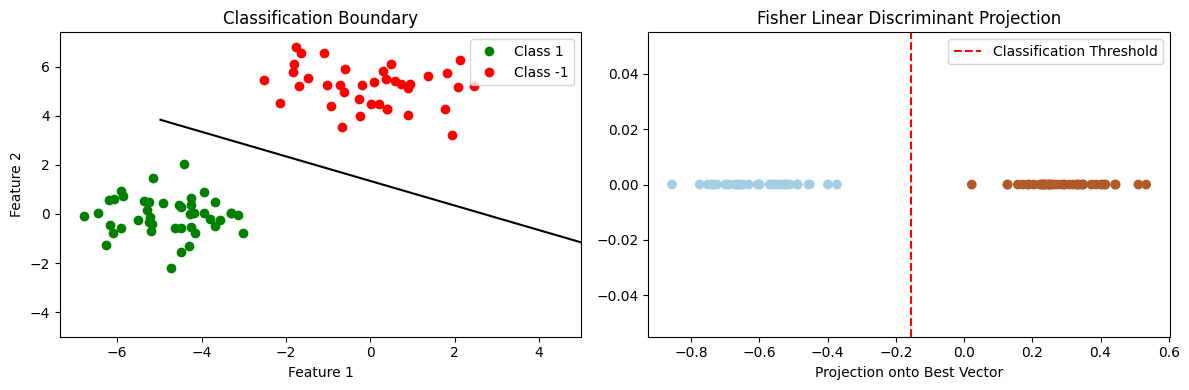

In [28]:
w_test,threshold_test,accuaracy_test = fisher_linear_discriminant(X_test,y_test)
print('测试集上的准确率为：',accuaracy_test)
print('最佳投影向量为：',w_test)
print('分类阈值为：',threshold_test)

#绘图
# 投影训练数据到一维空间
projection_test = np.dot(X_test, w_test)
xx, yy = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
Z = w_test[0] * xx + w_test[1] * yy - threshold_test

plt.figure(figsize=(12, 4))
plt.subplot(121)
label_added_green = False
label_added_red = False
for i in range(X_test.shape[0]):
    if y_test[i] > 0:
        plt.plot(X_test[i][0], X_test[i][1], 'o', color='green')
        if not label_added_green:
            plt.plot(X_test[i][0], X_test[i][1], 'o', color='green', label='Class 1')
            label_added_green = True    
    else:
        plt.plot(X_test[i][0], X_test[i][1], 'o', color='red')
        if not label_added_red:
            plt.plot(X_test[i][0], X_test[i][1], 'o', color='red', label='Class -1')
            label_added_red = True
plt.contour(xx, yy, Z, levels=[0], colors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper right')
plt.title('Classification Boundary')


plt.subplot(122)
# 绘制投影后的数据点
plt.scatter(projection_test, np.zeros_like(projection_test), c=y_test, cmap=plt.cm.Paired)
# 绘制分类阈值
plt.axvline(threshold_test, color='r', linestyle='--', label='Classification Threshold')
plt.xlabel('Projection onto Best Vector')
plt.legend()
plt.title('Fisher Linear Discriminant Projection')

plt.tight_layout()
plt.show()